STEP 1: Extracting coordination sphere from CIF

Structure formula: Yb16.368Ti15.632O56
Space group: ('Fd-3m', 227)

Atoms in structure:
  0: Yb3+ at [0.5  0.25 0.25]
  1: Yb3+ at [0.25 0.5  0.25]
  2: Yb3+ at [0.25 0.25 0.5 ]
  3: Yb3+ at [0.5 0.5 0.5]
  4: Yb3+ at [0.5  0.75 0.75]
  5: Yb3+ at [0.75 0.5  0.75]
  6: Yb3+ at [0.75 0.75 0.5 ]
  7: Yb3+ at [0.25 0.   0.75]
  8: Yb3+ at [0.25 0.75 0.  ]
  9: Yb3+ at [0.5 0.  0. ]
  10: Yb3+ at [0.75 0.   0.25]
  11: Yb3+ at [0.75 0.25 0.  ]
  12: Yb3+ at [0.   0.25 0.75]
  13: Yb3+ at [0.  0.5 0. ]
  14: Yb3+ at [0.   0.75 0.25]
  15: Yb3+ at [0.  0.  0.5]
  16: Yb3+:0.023, Ti4+:0.977 at [0.   0.75 0.75]
  17: Yb3+:0.023, Ti4+:0.977 at [0.75 0.   0.75]
  18: Yb3+:0.023, Ti4+:0.977 at [0.75 0.75 0.  ]
  19: Yb3+:0.023, Ti4+:0.977 at [0. 0. 0.]
  20: Yb3+:0.023, Ti4+:0.977 at [0.   0.25 0.25]
  21: Yb3+:0.023, Ti4+:0.977 at [0.25 0.   0.25]
  22: Yb3+:0.023, Ti4+:0.977 at [0.25 0.25 0.  ]
  23: Yb3+:0.023, Ti4+:0.977 at [0.75 0.5  0.25]
  2

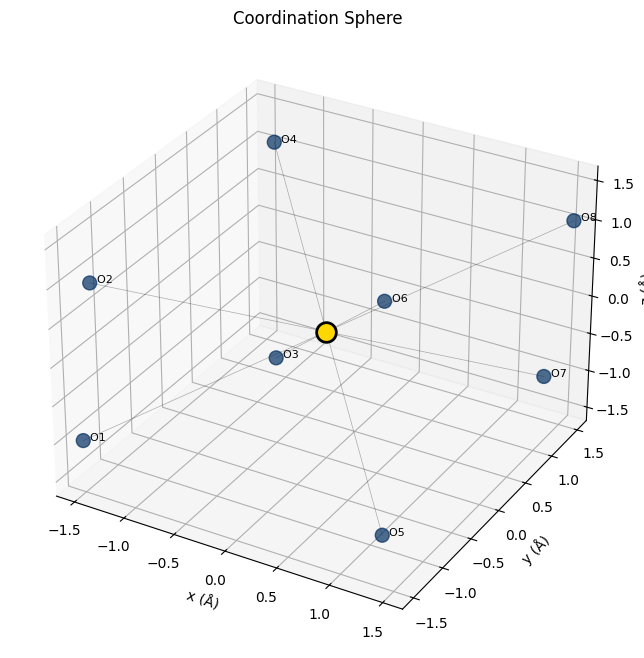


STEP 2: Calculating crystal field parameters (Bₖᵍ)

Crystal field parameters (cm^-1):

k = 2:
  B2, -2 =   111.090607
  B2, -1 =  -111.090607
  B2,  1 =   111.090607

k = 4:
  B4, -3 =  -397.723346
  B4, -2 =   425.184142
  B4, -1 =   150.325295
  B4,  0 =  1132.066455
  B4,  1 =  -150.325295
  B4,  3 =  -397.723346
  B4,  4 =   676.539107

k = 6:
  B6, -6 =   -21.270196
  B6, -5 =     4.388044
  B6, -3 =     8.397812
  B6, -2 =    -2.597667
  B6, -1 =    19.219546
  B6,  0 =  -149.046550
  B6,  1 =   -19.219546
  B6,  3 =     8.397812
  B6,  4 =   278.840561
  B6,  5 =    -4.388044

STEP 3: Free ion parameters

Free ion parameters for Yb³⁺ (f¹³):
  F² = 133119.0 cm⁻¹
  F⁴ =  83300.0 cm⁻¹
  F⁶ =  59864.0 cm⁻¹
  ζ  =   2906.0 cm⁻¹

STEP 4: Building Hamiltonian and calculating energy levels

Configuration: f13
Number of microstates: 14
Almost closed Shell, corresponding configuration: f1

Performing calculation with the following contributions: 
['Hee', 'Hso', 'Hcf']
Calculation result:

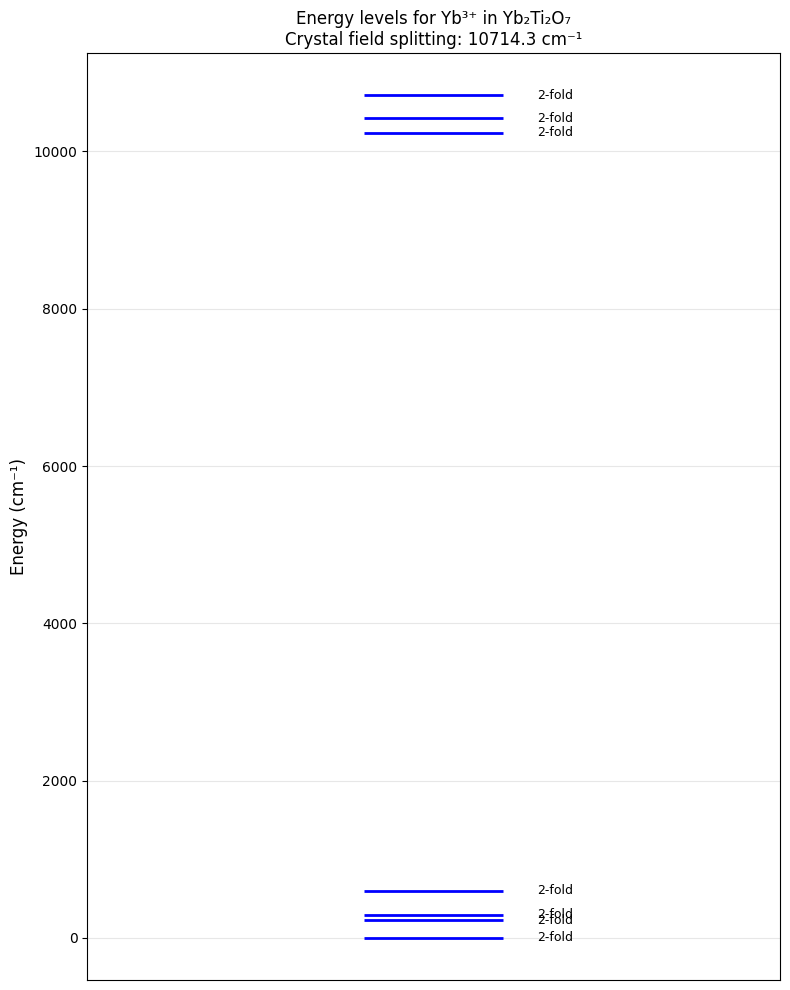


Energy level diagram saved as 'yb2ti2o7_energy_levels.png'

STEP 7: Saving results


UnicodeEncodeError: 'charmap' codec can't encode characters in position 29-30: character maps to <undefined>

In [ ]:
# Complete workflow for Yb2Ti2O7 crystal field calculation

import numpy as np
import matplotlib.pyplot as plt
import nja_cfs_red as nja
from cif_parser import parse_cif_to_nja, cif_to_bkq, visualize_coordination_sphere

# ============================================================================
# STEP 1: Parse CIF and extract coordination sphere
# ============================================================================

CIF_FILE = r'C:\Users\Timur\Documents\Python_Scripts\crystal-hub\edited_package\Yb2Ti2O7.cif'

charges = {
    'Yb': 3.0,   # Yb³⁺
    'Ti': 4.0,   # Ti⁴⁺
    'O': -2.0    # O²⁻
}

print("=" * 70)
print("STEP 1: Extracting coordination sphere from CIF")
print("=" * 70)

# Parse CIF - extract ligands around Yb³⁺
coordination_data = parse_cif_to_nja(
    cif_file=CIF_FILE,
    metal_center='Yb',
    coordination_cutoff=3.5,  # Adjust if needed
    charge_dict=charges,
    output_file='yb2ti2o7_coordination.txt'
)

# Visualize the coordination sphere
visualize_coordination_sphere(
    coordination_data, 
    metal_label='Yb³⁺',
    save_fig='yb2ti2o7_coordination.png'
)

# ============================================================================
# STEP 2: Calculate crystal field parameters (Point Charge Model)
# ============================================================================

print("\n" + "=" * 70)
print("STEP 2: Calculating crystal field parameters (Bₖᵍ)")
print("=" * 70)

# Calculate Bkq parameters using point charge model
dic_bkq = nja.calc_Bkq(
    coordination_data,
    'f13',  # Yb³⁺ has f¹³ configuration
    sph_flag=False,
    sth_param=True  # Use Sternheimer shielding parameters
)

print("\nCrystal field parameters (cm^-1):")
for k in sorted(dic_bkq.keys(), key=int):
    print(f"\nk = {k}:")
    for q in sorted(dic_bkq[k].keys(), key=lambda x: int(x)):
        value = dic_bkq[k][q]
        if abs(value) > 1e-6:
            print(f"  B{k:s},{q:>3s} = {value:12.6f}")

# ============================================================================
# STEP 3: Get free ion parameters for Yb³⁺
# ============================================================================

print("\n" + "=" * 70)
print("STEP 3: Free ion parameters")
print("=" * 70)

# Get Hartree-Fock parameters for Yb³⁺ (f¹³)
free_ion_params = nja.free_ion_param_f_HF('f13')

print("\nFree ion parameters for Yb³⁺ (f¹³):")
print(f"  F² = {free_ion_params['F2']:8.1f} cm⁻¹")
print(f"  F⁴ = {free_ion_params['F4']:8.1f} cm⁻¹")
print(f"  F⁶ = {free_ion_params['F6']:8.1f} cm⁻¹")
print(f"  ζ  = {free_ion_params['zeta']:8.1f} cm⁻¹")

# Optional: Scale parameters (often done in fitting to experiments)
# free_ion_params['F2'] *= 0.7  # Example: 70% of Hartree-Fock
# free_ion_params['F4'] *= 0.7
# free_ion_params['F6'] *= 0.7
# free_ion_params['zeta'] *= 1.0

# ============================================================================
# STEP 4: Build Hamiltonian and calculate energy levels
# ============================================================================

print("\n" + "=" * 70)
print("STEP 4: Building Hamiltonian and calculating energy levels")
print("=" * 70)

# Create calculation object
calc = nja.calculation('f13', ground_only=False, TAB=True, wordy=True)

# Build and diagonalize Hamiltonian
# Includes: electron-electron repulsion (Hee), spin-orbit coupling (Hso), crystal field (Hcf)
result = calc.MatrixH(
    ['Hee', 'Hso', 'Hcf'],
    F2=free_ion_params['F2'],
    F4=free_ion_params['F4'],
    F6=free_ion_params['F6'],
    zeta=free_ion_params['zeta'],
    dic_bkq=dic_bkq,
    wordy=True,
    ground_proj=True,  # Calculate wavefunction composition
    return_proj=True   # Return projection data
)

# Extract results
if isinstance(result, tuple):
    energy_result, projections = result
    eigenvalues = energy_result[0, :].real
    eigenvectors = energy_result[1:, :]
else:
    eigenvalues = result[0, :].real
    eigenvectors = result[1:, :]
    projections = None

# Shift energies relative to ground state
energies_relative = eigenvalues - eigenvalues[0]

# ============================================================================
# STEP 5: Analyze results
# ============================================================================

print("\n" + "=" * 70)
print("STEP 5: Results summary")
print("=" * 70)

print(f"\nTotal number of states: {len(energies_relative)}")
print(f"Ground state energy: {eigenvalues[0]:.3f} cm⁻¹")
print(f"Crystal field splitting: {energies_relative[-1]:.3f} cm⁻¹")

# Print energy levels with degeneracies
print("\nEnergy levels (relative to ground state):")
print("-" * 50)
unique_energies, counts = np.unique(np.round(energies_relative, 3), return_counts=True)
for i, (E, deg) in enumerate(zip(unique_energies, counts)):
    deg_str = f" ({deg}-fold)" if deg > 1 else ""
    print(f"  Level {i+1:3d}: {E:10.3f} cm⁻¹{deg_str}")

# Ground state analysis (if Kramers doublet)
print("\n" + "=" * 70)
print("Ground state doublet analysis")
print("=" * 70)

# For Yb³⁺ (f¹³, one hole), ground doublet should be levels 0 and 1
if len(eigenvalues) > 1:
    doublet_splitting = energies_relative[1]
    print(f"Ground doublet splitting: {doublet_splitting:.6f} cm⁻¹")
    
    # Calculate effective g-tensor
    magn = nja.Magnetics(
        calc,
        ['Hee', 'Hso', 'Hcf'],
        {'F2': free_ion_params['F2'], 'F4': free_ion_params['F4'], 
         'F6': free_ion_params['F6'], 'zeta': free_ion_params['zeta'], 
         'dic_bkq': dic_bkq},
        wordy=False
    )
    
    g_values, g_directions = magn.effGval(
        levels=[0, 1],
        v_matrix=eigenvectors
    )
    
    print("\nEffective g-tensor for ground Kramers doublet:")
    print(f"  g₁ = {g_values[0]:.4f}")
    print(f"  g₂ = {g_values[1]:.4f}")
    print(f"  g₃ = {g_values[2]:.4f}")
    print(f"\nAnisotropy: Δg = {np.max(g_values) - np.min(g_values):.4f}")
    print(f"Average: ḡ = {np.mean(g_values):.4f}")

# ============================================================================
# STEP 6: Visualize energy level diagram
# ============================================================================

print("\n" + "=" * 70)
print("STEP 6: Creating energy level diagram")
print("=" * 70)

fig, ax = plt.subplots(figsize=(8, 10))

# Plot energy levels
tolerance = 0.05  # cm⁻¹ - consider levels within this as degenerate
plotted_levels = []

for i, E in enumerate(energies_relative):
    # Check if this is part of an already plotted degenerate level
    is_new_level = True
    for prev_E in plotted_levels:
        if abs(E - prev_E) < tolerance:
            is_new_level = False
            break
    
    if is_new_level:
        plotted_levels.append(E)
        # Count degeneracy
        deg = np.sum(np.abs(energies_relative - E) < tolerance)
        
        # Draw level
        ax.hlines(E, 0.4, 0.6, colors='blue', linewidth=2)
        
        # Label if degenerate
        if deg > 1:
            ax.text(0.65, E, f'{deg}-fold', va='center', fontsize=9)

ax.set_xlim(0, 1)
ax.set_ylabel('Energy (cm⁻¹)', fontsize=12)
ax.set_title(f'Energy levels for Yb³⁺ in Yb₂Ti₂O₇\nCrystal field splitting: {energies_relative[-1]:.1f} cm⁻¹', 
             fontsize=12)
ax.set_xticks([])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('yb2ti2o7_energy_levels.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nEnergy level diagram saved as 'yb2ti2o7_energy_levels.png'")

# ============================================================================
# STEP 7: Save results
# ============================================================================

print("\n" + "=" * 70)
print("STEP 7: Saving results")
print("=" * 70)

# Save eigenvalues and eigenvectors
np.save('yb2ti2o7_eigenvalues.npy', eigenvalues)
np.save('yb2ti2o7_eigenvectors.npy', eigenvectors)

# Save Bkq parameters
with open('yb2ti2o7_bkq_parameters.txt', 'w') as f:
    f.write("Crystal field parameters (Bkg) for Yb3+ in Yb2Ti2O7\n")
    f.write("=" * 60 + "\n\n")
    for k in sorted(dic_bkq.keys(), key=int):
        f.write(f"k = {k}:\n")
        for q in sorted(dic_bkq[k].keys(), key=lambda x: int(x)):
            value = dic_bkq[k][q]
            if abs(value) > 1e-10:
                f.write(f"  B{k},{q:>3s} = {value:15.8f} cm^-1\n")
        f.write("\n")

print("\nResults saved:")
print("  - yb2ti2o7_eigenvalues.npy")
print("  - yb2ti2o7_eigenvectors.npy")
print("  - yb2ti2o7_bkq_parameters.txt")
print("  - yb2ti2o7_energy_levels.png")
print("  - yb2ti2o7_coordination.png")

print("\n" + "=" * 70)
print("CALCULATION COMPLETE!")
print("=" * 70)